<h1>Table of Contents</h1>

<ol>
  <li>Importing The Libraries and Datasets Which are Required</li>
        <ol type="i">
        <li>Importing Libraries</li>
        <li>Importing Dataset</li>
        </ol>
  <li>Understanding the Data</li>
        <ol type="i">
        <li>How data looks like</li>
        <li>Size of dataset</li>
        <li>Types of data columns</li>
        <li>check the missing values</li>
        <li>Data looks like in mathematically form</li>
        <ul>
        <li>Descriptive Analysis</li>
        </ul>
        <li>the Correlation between columns?</li>
        <li>the Covariance between columns?</li>
        </ol>
</ol>


# Importing The Libraries and Datasets Which are Required

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import Dataset

In [2]:
df=pd.read_csv('test.csv')

# Make Data Understanding

## How Does Data Look_like?

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## How Big is Data?

In [4]:
df.shape

(200, 4)

## How Does Data Look_like Mathematically?

### Descriptive Analysis

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.describe().T.style.bar(subset=["mean"],cmap='coolwarm')\
.bar(subset=["max"],cmap='coolwarm')\
.bar(subset=["std"],cmap='coolwarm')\
.bar(subset=["min"],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales,200.000000,15.130500,5.283892,1.600000,11.000000,16.000000,19.050000,27.000000


## Are there any Missing Values?

In [7]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(df)

,Missing_Number,Missing_Percent
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


## Are there any Duplicate Values?

In [8]:
df.duplicated().sum()

0

In [9]:
df['TV'] = df['TV'].astype(int)
df['Radio'] = df['Radio'].astype(int)
df['Newspaper'] = df['Newspaper'].astype(int)
df['Sales'] = df['Sales'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   Radio      200 non-null    int64
 2   Newspaper  200 non-null    int64
 3   Sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [11]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10


## How is the Correlation between columns?

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.899568
Radio,0.055388,1.000000,0.352552,0.355736
Newspaper,0.055569,0.352552,1.000000,0.159715
Sales,0.899568,0.355736,0.159715,1.000000


In [14]:
df.corr().T.style.bar(subset=["TV"],cmap='coolwarm')\
.bar(subset=["Radio"],cmap='coolwarm')\
.bar(subset=["Newspaper"],cmap='coolwarm')\
.bar(subset=["Sales"],cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.899568
Radio,0.055388,1.000000,0.352552,0.355736
Newspaper,0.055569,0.352552,1.000000,0.159715
Sales,0.899568,0.355736,0.159715,1.000000


## How is the Covariance between columns?

In [15]:
df.cov()

,TV,Radio,Newspaper,Sales
TV,7365.884523,70.477085,103.822111,408.478342
Radio,70.477085,219.804925,113.784925,27.904171
Newspaper,103.822111,113.784925,473.899497,18.395477
Sales,408.478342,27.904171,18.395477,27.992739


In [16]:
df.cov().T.style.bar(subset=["TV"],cmap='coolwarm')\
.bar(subset=["Radio"],cmap='coolwarm')\
.bar(subset=["Newspaper"],cmap='coolwarm')\
.bar(subset=["Sales"],cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,7365.884523,70.477085,103.822111,408.478342
Radio,70.477085,219.804925,113.784925,27.904171
Newspaper,103.822111,113.784925,473.899497,18.395477
Sales,408.478342,27.904171,18.395477,27.992739


## if any un-Unique Values

In [17]:
df.nunique()

TV           148
Radio         49
Newspaper     74
Sales         26
dtype: int64

# Exploarity Data Analysis

### Categorical Feature

In [19]:
categorical_feature=df.select_dtypes(include=['object']).columns
categorical_feature

Index([], dtype='object')

### Numerical Feature

In [20]:
numerical_feature=df.select_dtypes(include=['float','int64']).columns
numerical_feature

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### Histogram

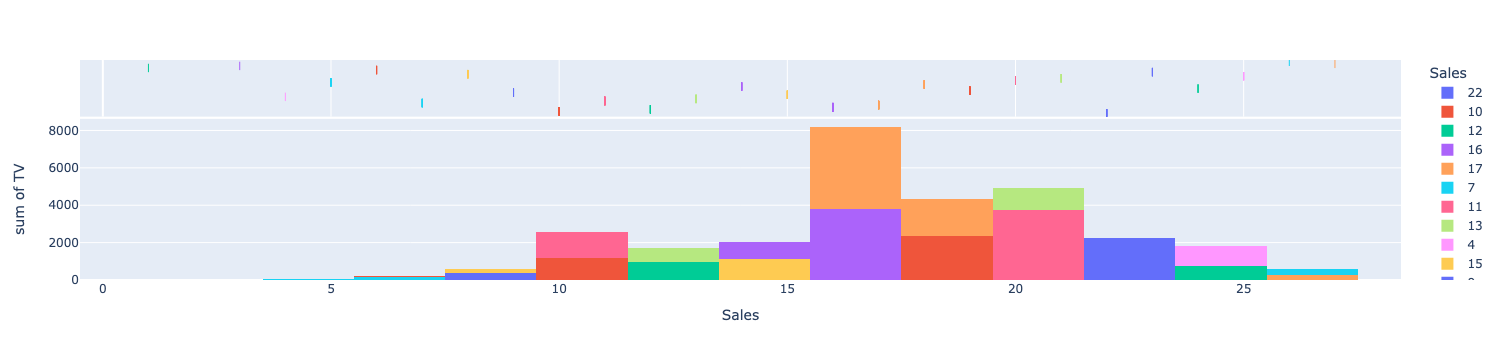

In [29]:
fig = px.histogram(df, x="Sales", y="TV", color="Sales", marginal="rug",
                   hover_data=df.columns)
fig.show()

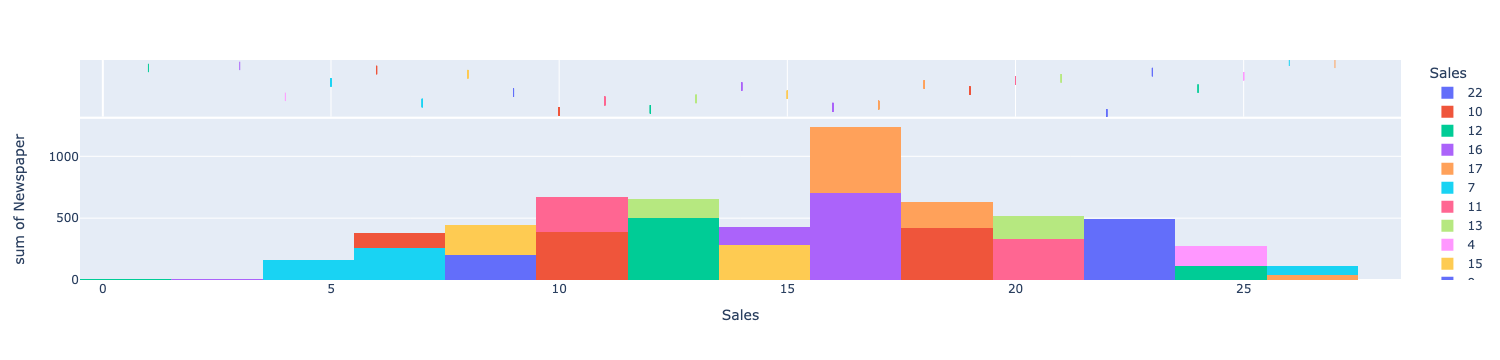

In [30]:
fig = px.histogram(df, x="Sales", y="Newspaper", color="Sales", marginal="rug",
                   hover_data=df.columns)
fig.show()

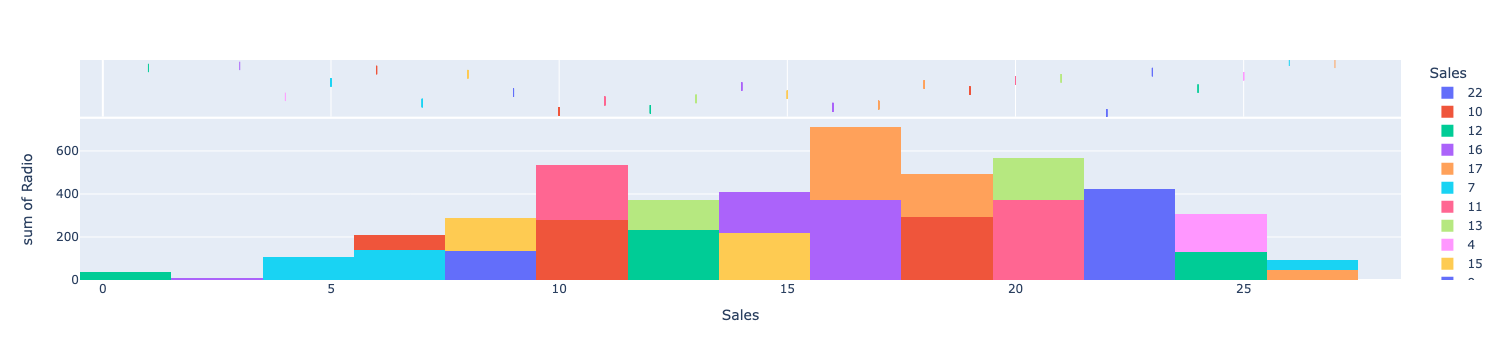

In [31]:
fig = px.histogram(df, x="Sales", y="Radio", color="Sales", marginal="rug",
                   hover_data=df.columns)
fig.show()

#### BoxPlot

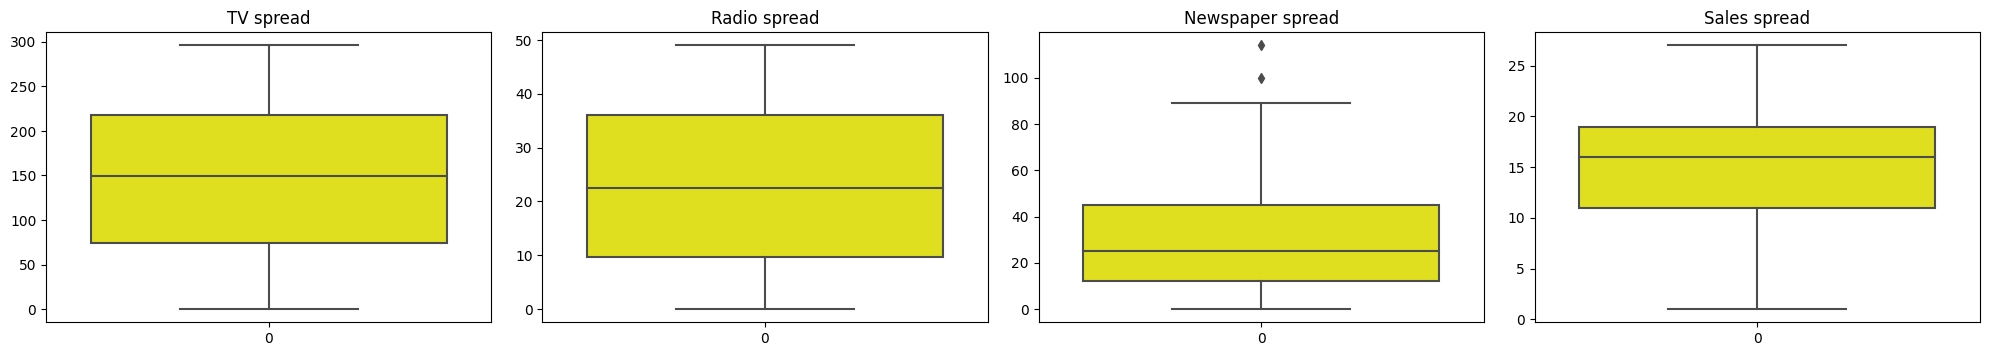

In [25]:
plt.figure(figsize=(20, 10))

for (i, x) in enumerate(numerical_feature):

    plt.subplot(3, 4, i+1)
    sns.boxplot(data = df[x],color='yellow')
    plt.title(f'{x} spread')

plt.tight_layout()

## Scatter_Plot

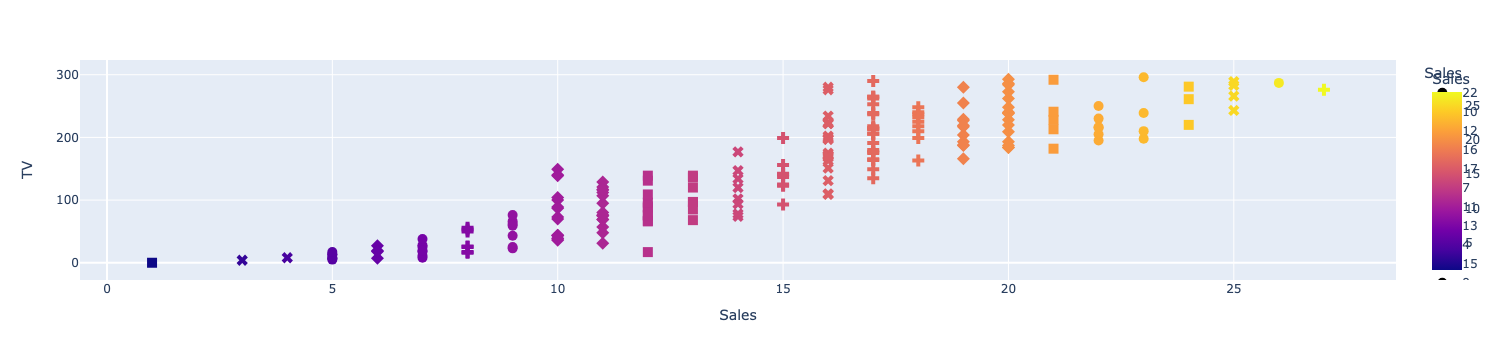

In [26]:
fig = px.scatter(df, y="TV", x="Sales", color="Sales", symbol="Sales")
fig.update_traces(marker_size=10)
fig.show()

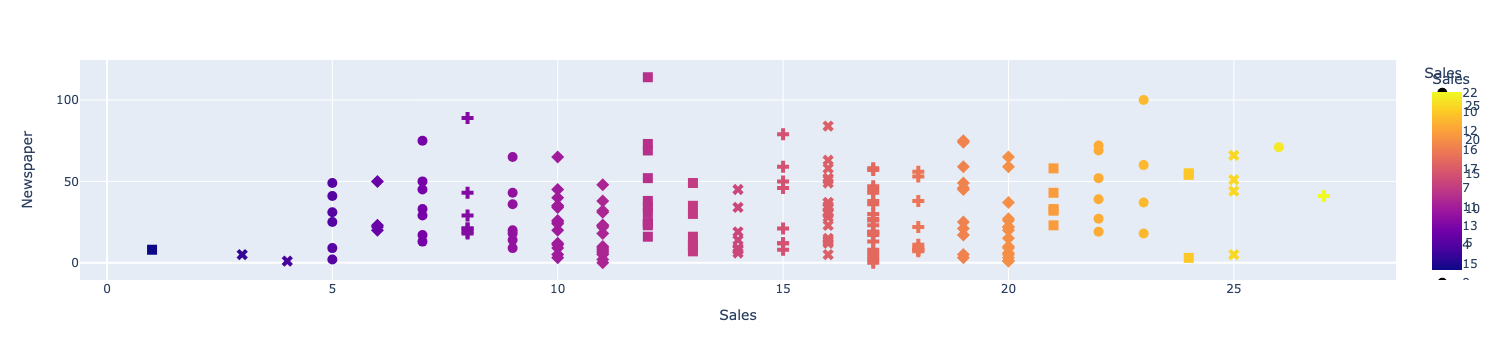

In [27]:
fig = px.scatter(df, y="Newspaper", x="Sales", color="Sales", symbol="Sales")
fig.update_traces(marker_size=10)
fig.show()

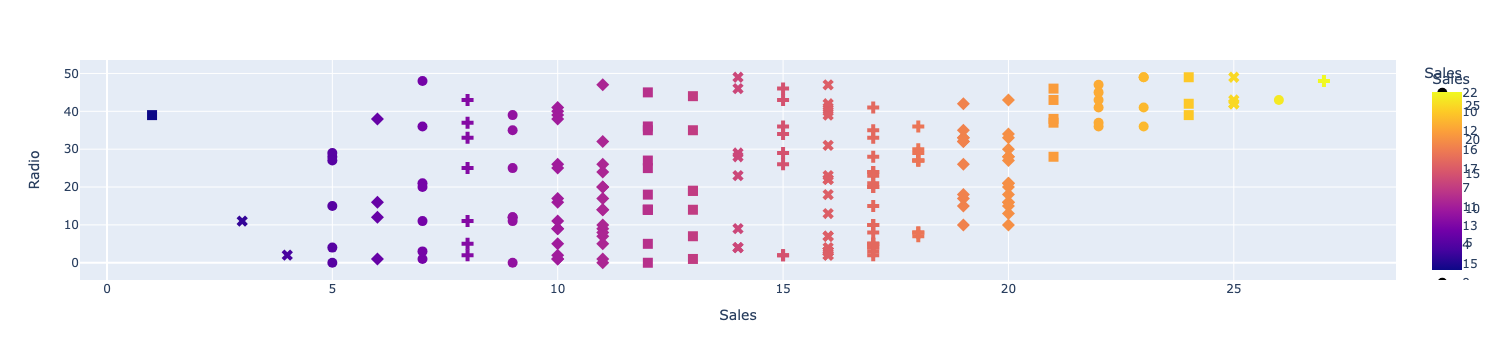

In [28]:
fig = px.scatter(df, y="Radio", x="Sales", color="Sales", symbol="Sales")
fig.update_traces(marker_size=10)
fig.show()

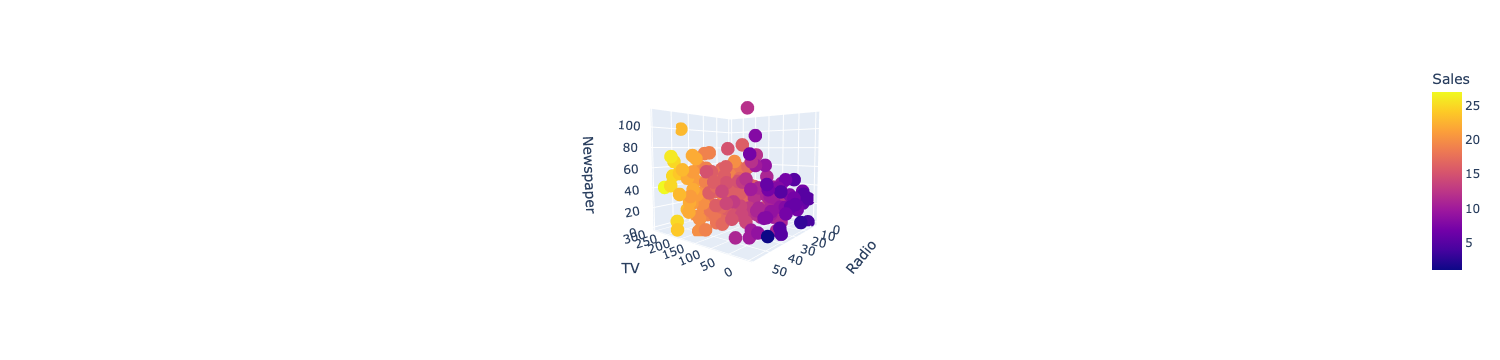

In [32]:
fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper',color='Sales')
fig.show()

## Cluster_Map

### Heatmap For The Descriptive Analysis Correlation

<Axes: >

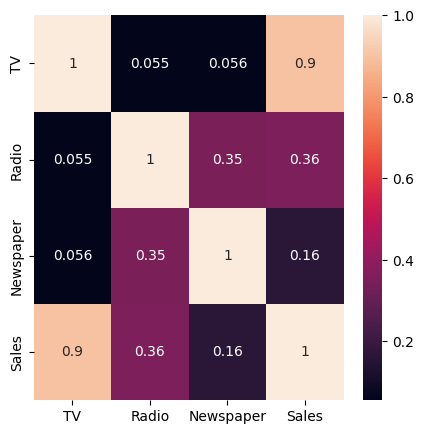

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

### Line Plots

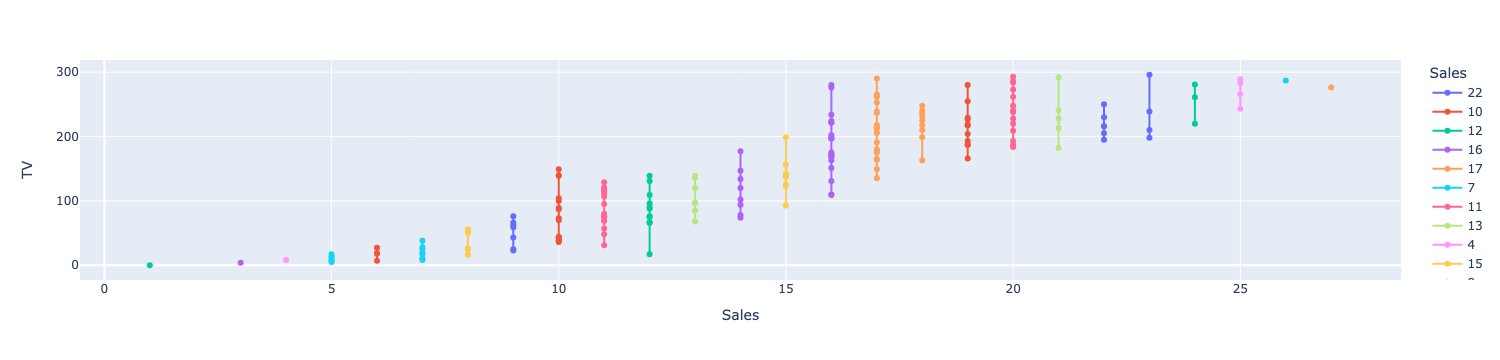

In [36]:
fig = px.line(df, x='Sales', y='TV', color='Sales', markers=True)
fig.show()

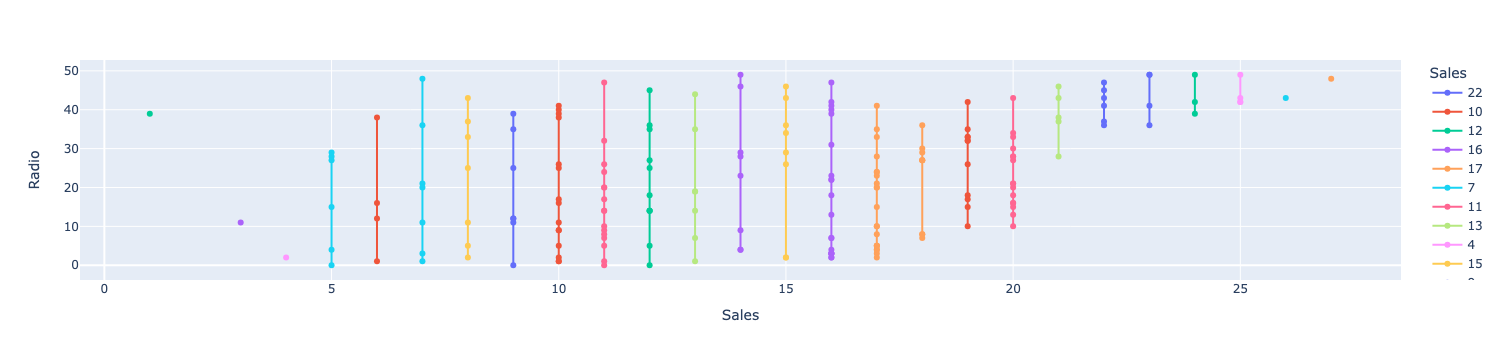

In [35]:
fig = px.line(df, x='Sales', y='Radio', color='Sales', markers=True)
fig.show()

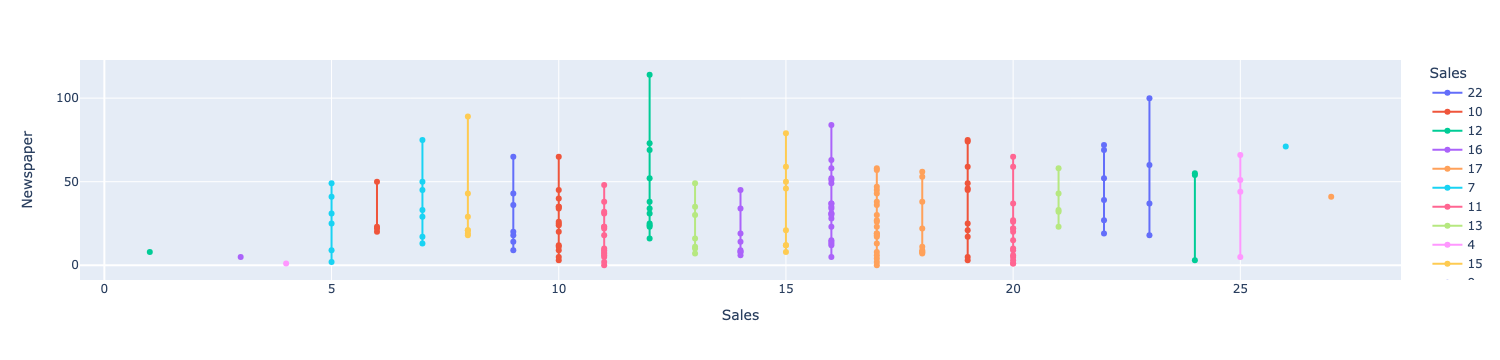

In [34]:
fig = px.line(df, x='Sales', y='Newspaper', color='Sales', markers=True)
fig.show()

# Feature Engineering

## Feature Selection

In [37]:
x = df.drop('Sales', axis=1)
y= df.Sales
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [39]:
x_train

,TV,Radio,Newspaper
77,120,28,14
73,129,5,31
71,109,14,31
78,5,29,9
42,293,27,1
...,...,...,...
0,230,37,69
184,253,21,30
131,265,2,43
152,197,23,14


In [40]:
y_train

77     14
73     11
71     12
78      5
42     20
       ..
0      22
184    17
131    17
152    16
106     7
Name: Sales, Length: 140, dtype: int64

## Model Building(LinearRegression)

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Prediction

### Coefficients

In [45]:
print("Coefficients: ", model.coef_)

Coefficients:  [ 0.05213744  0.10853986 -0.00103052]


### Intercept

In [46]:
print("Intercept: ", model.intercept_)

Intercept:  4.613476717126492


### Mean Squared Error (MSE

In [47]:
print("Mean Squared Error (MSE): ", mse)

Mean Squared Error (MSE):  3.6492828049842427


### Mean Absolute Error (MAE)

In [48]:
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  1.4084624081915895


### R-squared

In [49]:
print("R-squared (R²): ", r2)

R-squared (R²):  0.888038775701657
